In [1]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [20, 12]

In [42]:
plt.rcParams['figure.figsize'] = [25, 12]

In [43]:
def chi_2(p_s,e_s,p_n,e_n,a=1):
    return sum((p_s-a*p_n)**2/(e_s**2 + a**2*e_n**2))

In [44]:
def P_flat(a,w):
    if a<1/w or a>w:
        return 0
    return 1

In [45]:
def P_log_norm(a,sig_a):
    return np.exp(-np.log(a)**2/sig_a**2)

In [46]:
def chi_square(fi,si,ri,sri,a_s):
    return np.array([chi_2(fi,si,ri,sri,a=a) for a in a_s])

def weight(fi,si,ri,sri,a_s,p_a):
    return p_a*np.exp(-chi_square(fi,si,ri,sri,a_s)/2)

In [47]:
def weights_and_min(fi,si,ri,sri,a_s,p_a):
    chi_s =chi_square(fi,si,ri,sri,a_s)
    w_s = np.exp(-chi_s/2)
    w_s_p = p_a*np.exp(-chi_s/2)
    
    min_index = np.where(chi_s == np.amin(chi_s))[0][0]
    a_min = a_s[min_index]
    max_index = np.where(w_s_p == np.amax(w_s_p))[0][0]
    a_max = a_s[max_index]
    
    min_a_no_err = np.sum(ri*fi)/np.sum(ri**2)
    min_a_source_err = np.sum(ri*fi/si**2)/np.sum(ri**2/si**2)
    
    return chi_s, w_s, w_s_p, a_min, a_max, min_a_no_err, min_a_source_err
    
    

---------------------------------------

In [48]:
photometries_source = np.array([1,2,3,4,5,6])
phot_err_source = np.array([0.1,0.2,0.1,0.1,0.3,0.1])


photometries_neigh = np.array([1.8,4,6,8.1,9.8,11.8])
phot_err_neigh = np.array([0.1,0.1,0.1,0.3,0.3,0.5])

In [49]:
np.log(0.0001)

-9.210340371976182

In [50]:
a_min = 0.0001
a_max = 4

a_sample_number = 1600

a_s = np.array([np.exp(np.log(a_min) + i*(np.log(a_max) - np.log(a_min))/(a_sample_number-1))  for i in range(a_sample_number)])
p_flat = np.array([P_flat(a,1.8) for a in a_s])
p_lognormal= P_log_norm(a_s,0.6)

chi_s =np.array([chi_2(photometries_source,phot_err_source,photometries_neigh,phot_err_neigh,a=a) for a in a_s])
w_s = np.exp(-chi_s/2)
w_s_p_flat = p_flat*np.exp(-chi_s/2)
w_s_p_log = p_lognormal*np.exp(-chi_s/2)

chi_p_flat = np.log(p_flat)-chi_s/2
chi_p_log = np.log(p_lognormal)-chi_s/2

/home/aalvarez/miniconda3/envs/phz/lib/python3.7/site-packages/ipykernel_launcher.py:15: RuntimeWarning: divide by zero encountered in log
  from ipykernel import kernelapp as app


In [51]:
test = np.exp(np.log(a_min) + np.arange(a_sample_number) * (np.log(a_max) - np.log(a_min)) / (a_sample_number - 1))

In [52]:
np.isclose(test, a_s).all()

True

In [53]:
test[np.isclose(test, 1, rtol=1e-2)]

array([0.99463072, 1.00124407, 1.00790138])

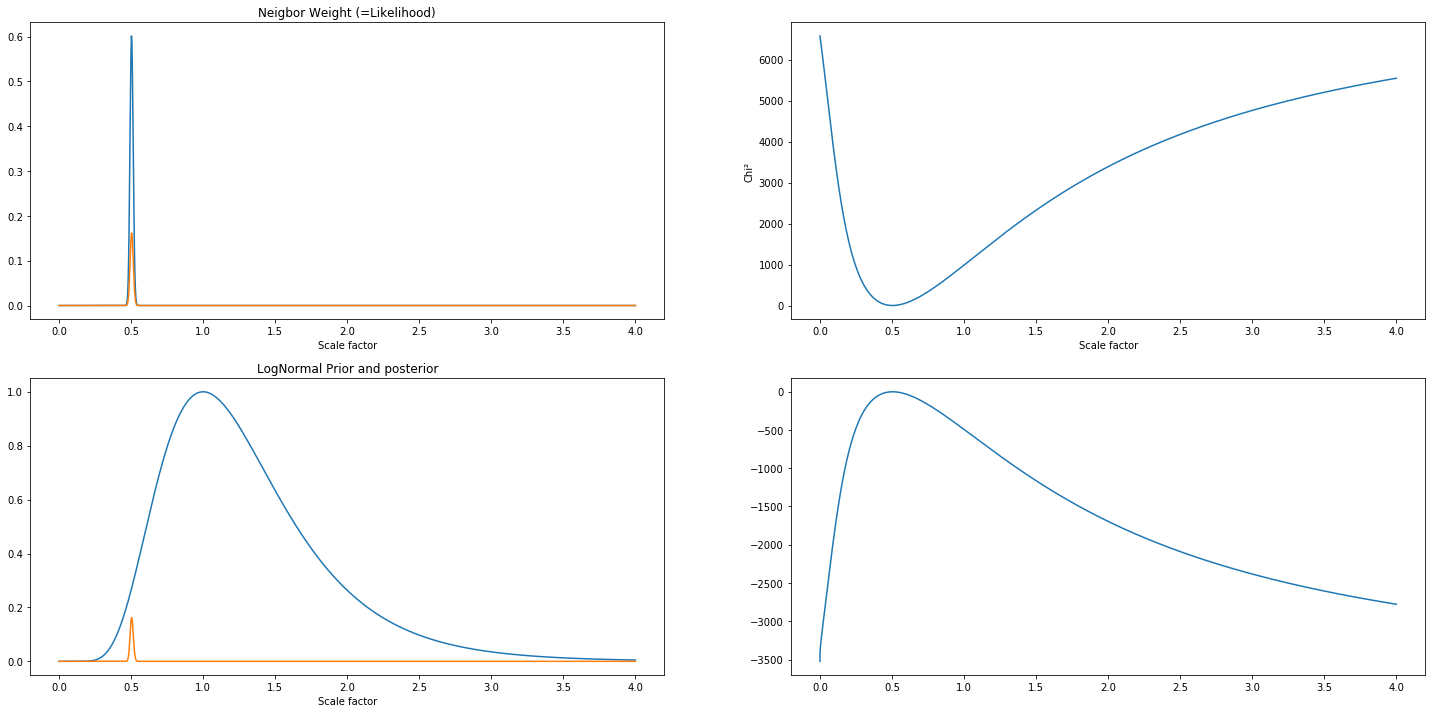

In [54]:
fig = plt.figure()
ax = fig.add_subplot(221)
ax.plot(a_s,w_s)
ax.plot(a_s, w_s_p_log)
plt.xlabel("Scale factor")
ax.set_title("Neigbor Weight (=Likelihood)")

ax = fig.add_subplot(222)
plt.plot(a_s,chi_s)
plt.xlabel("Scale factor")
plt.ylabel("Chi²")

ax = fig.add_subplot(223)
#plt.plot(a_s,p_flat,'--')
plt.plot(a_s,p_lognormal)
#plt.plot(a_s,w_s_p_flat,'--')
plt.plot(a_s,w_s_p_log)
plt.xlabel("Scale factor")
ax.set_title("LogNormal Prior and posterior")

ax = fig.add_subplot(224)
plt.plot(a_s,chi_p_log)

plt.show()

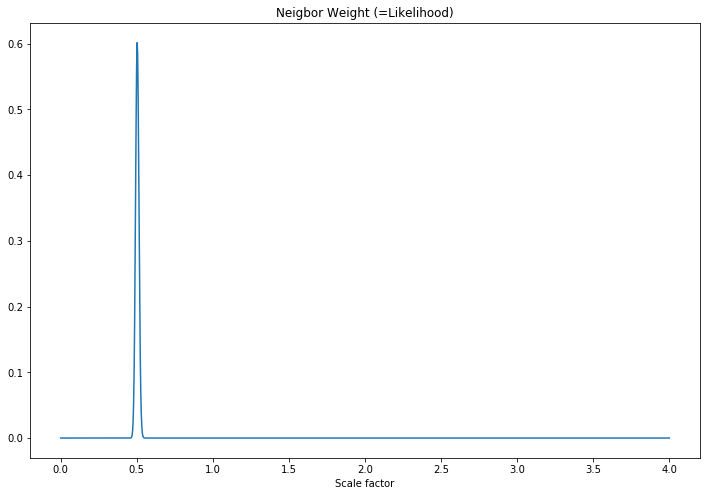

In [55]:
plt.rcParams['figure.figsize'] = [12, 8]
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(a_s,w_s)
plt.xlabel("Scale factor")
ax.set_title("Neigbor Weight (=Likelihood)")


plt.show()

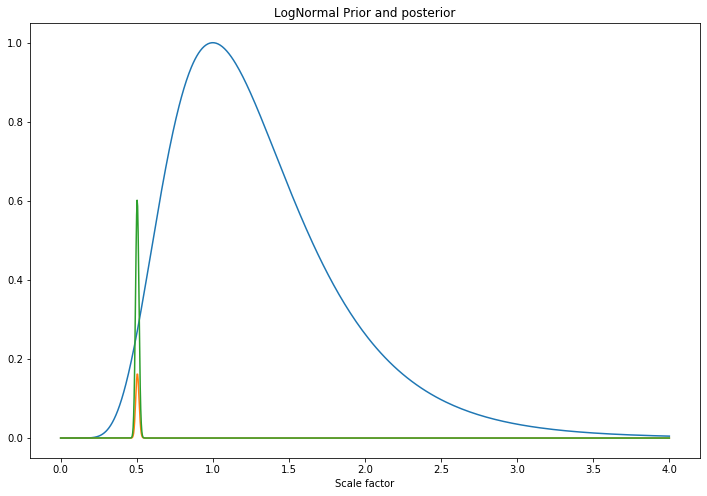

In [16]:
fig = plt.figure()
ax = fig.add_subplot(111)

#plt.plot(a_s,p_flat,'--')
plt.plot(a_s,p_lognormal)
#plt.plot(a_s,w_s_p_flat,'--')
plt.plot(a_s,w_s_p_log)
ax.plot(a_s,w_s)
plt.xlabel("Scale factor")
ax.set_title("LogNormal Prior and posterior")



plt.show()

(0.3, 0.7)

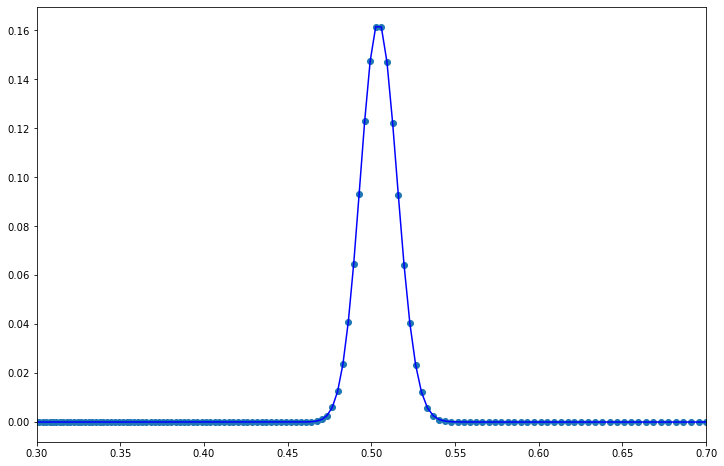

In [17]:
plt.plot(a_s,w_s_p_log,'o')
plt.plot(a_s,w_s_p_log,'blue')
plt.xlim([0.3,0.7])

dominant point

In [18]:
chi_s, w_s, w_s_p, a_min, a_max, min_a_no_err, min_a_source_err = weights_and_min(photometries_source,phot_err_source,photometries_neigh,phot_err_neigh,a_s,p_lognormal)

In [19]:
p_ln= P_log_norm([a_min],0.6)
w_chi = weight(photometries_source,phot_err_source,photometries_neigh,phot_err_neigh,[a_min],p_ln)

p_ln= P_log_norm([a_max],0.6)
w_w = weight(photometries_source,phot_err_source,photometries_neigh,phot_err_neigh,[a_max],p_ln)

p_ln= P_log_norm([min_a_no_err],0.6)
w_an = weight(photometries_source,phot_err_source,photometries_neigh,phot_err_neigh,[min_a_no_err],p_ln)

p_ln= P_log_norm([min_a_source_err],0.6)
w_as = weight(photometries_source,phot_err_source,photometries_neigh,phot_err_neigh,[min_a_source_err],p_ln)

In [20]:
print( "From Chi²: " + str(a_min)+ " weight="+str(w_chi))
print( "From weight: " + str(a_max)+ " weight="+str(w_w))
print( "analitical without errors: " + str(min_a_no_err)+ " weight="+str(w_an))
print( "analitical only source errors: " + str(min_a_source_err)+ " weight="+str(w_as))

From Chi²: 0.5025959444882406 weight=[0.16153763]
From weight: 0.5025959444882406 weight=[0.16153763]
analitical without errors: 0.5054334091483447 weight=[0.16240324]
analitical only source errors: 0.5041114713270497 weight=[0.16334205]


In [21]:
centers = np.array(range(8))+1
sigmas=centers/10
sigma_sigmas=sigmas/10

r_i = np.random.normal(centers,sigmas)
sr_i = np.random.normal(sigmas,sigma_sigmas)


sources_id = range(10000)
weight_true =np.zeros(len(sources_id))
weight_chi =np.zeros(len(sources_id))
weight_a_n =np.zeros(len(sources_id))
weight_a_s =np.zeros(len(sources_id))

a_w =np.zeros(len(sources_id))
a_chi =np.zeros(len(sources_id))
a_a_n =np.zeros(len(sources_id))
a_a_s =np.zeros(len(sources_id))

for source_index in sources_id:
    f_i = np.random.normal(centers,sigmas)
    s_i = np.random.normal(sigmas,sigma_sigmas)
    chi_s, w_s, w_s_p, a_min, a_max, min_a_no_err, min_a_source_err = weights_and_min(f_i,s_i,r_i,sr_i,a_s,p_lognormal)
   
    a_w[source_index] = a_max
    a_chi[source_index] = a_min
    a_a_n[source_index] = min_a_no_err
    a_a_s[source_index] = min_a_source_err

    p_ln= P_log_norm([a_min],0.6)
    weight_chi[source_index] = weight(f_i,s_i,r_i,sr_i,[a_min],p_ln)

    p_ln= P_log_norm([a_max],0.6)
    weight_true[source_index] = weight(f_i,s_i,r_i,sr_i,[a_max],p_ln)

    p_ln= P_log_norm([min_a_no_err],0.6)
    weight_a_n[source_index] = weight(f_i,s_i,r_i,sr_i,[min_a_no_err],p_ln)

    p_ln= P_log_norm([min_a_source_err],0.6)
    weight_a_s[source_index] = weight(f_i,s_i,r_i,sr_i,[min_a_source_err],p_ln)

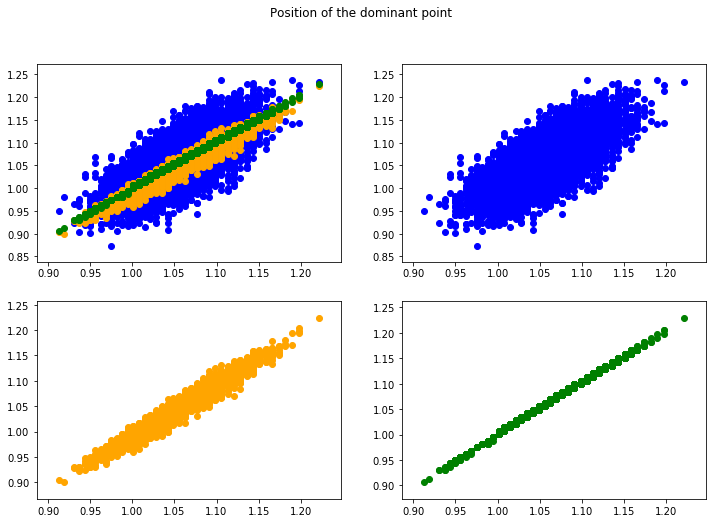

In [22]:


fig = plt.figure()
fig.suptitle("Position of the dominant point")
ax = fig.add_subplot(221)
plt.scatter(a_w,a_a_n, c='blue')
plt.scatter(a_w,a_a_s, c='orange')
plt.scatter(a_w,a_chi, c='green')


ax = fig.add_subplot(222)
plt.scatter(a_w,a_a_n, c='blue')

ax = fig.add_subplot(223)
plt.scatter(a_w,a_a_s, c='orange')

ax = fig.add_subplot(224)
plt.scatter(a_w,a_chi, c='green')

plt.show()

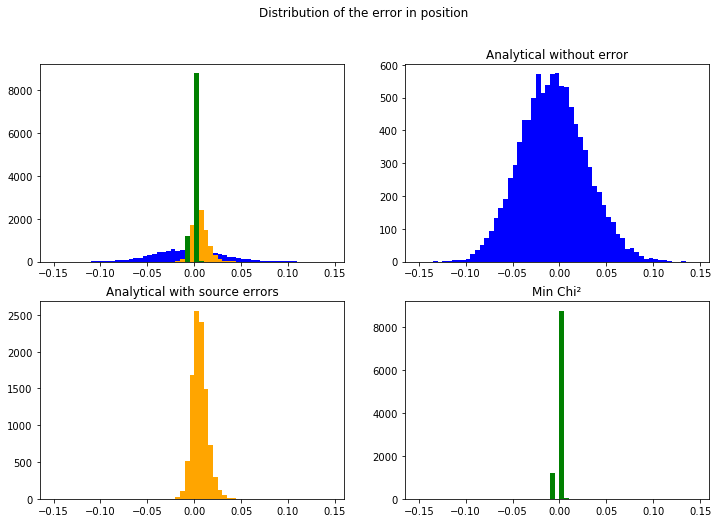

In [23]:
bins=[(i-30)/200  for i in range(60)]
    
fig = plt.figure()
fig.suptitle("Distribution of the error in position")
ax = fig.add_subplot(221)
plt.hist(a_w - a_a_n, bins=bins,color='blue')
plt.hist(a_w - a_a_s, bins=bins,color='orange')
plt.hist(a_w - a_chi, bins=bins,color='green')


ax = fig.add_subplot(222)
plt.hist(a_w - a_a_n, bins=bins,color='blue')
ax.set_title("Analytical without error")

ax = fig.add_subplot(223)
plt.hist(a_w - a_a_s, bins=bins,color='orange')
ax.set_title("Analytical with source errors")

ax = fig.add_subplot(224)
plt.hist(a_w - a_chi, bins=bins,color='green')
ax.set_title("Min Chi²")


plt.show()

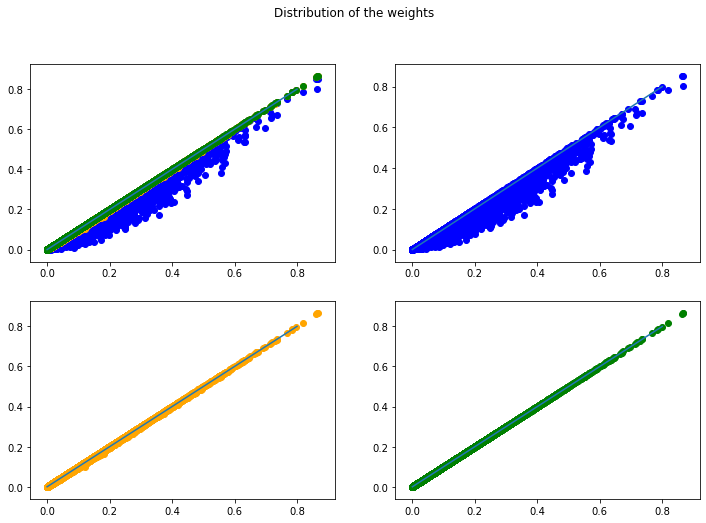

In [24]:


fig = plt.figure()
fig.suptitle("Distribution of the weights")
ax = fig.add_subplot(221)
ax.scatter(weight_true,weight_a_n, c='blue')
ax.scatter(weight_true,weight_a_s, c='orange')
ax.scatter(weight_true,weight_chi, c='green')
ax.plot([0,0.8],[0,0.8])

ax = fig.add_subplot(222)
ax.scatter(weight_true,weight_a_n, c='blue')
ax.plot([0,0.8],[0,0.8])

ax = fig.add_subplot(223)
ax.scatter(weight_true,weight_a_s, c='orange')
ax.plot([0,0.8],[0,0.8])

ax = fig.add_subplot(224)
ax.scatter(weight_true,weight_chi, c='green')
ax.plot([0,0.8],[0,0.8])

plt.show()

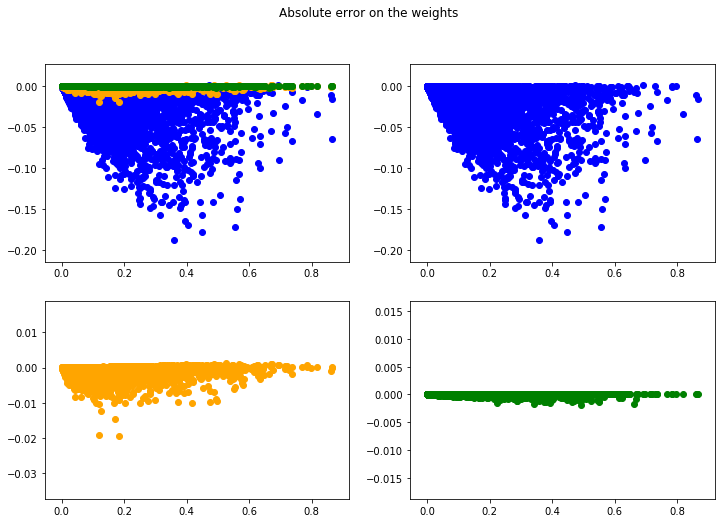

In [25]:
fig = plt.figure()
fig.suptitle("Absolute error on the weights")
ax = fig.add_subplot(221)
ax.scatter(weight_true,-(weight_true-weight_a_n), c='blue')
ax.scatter(weight_true,-(weight_true-weight_a_s), c='orange')
ax.scatter(weight_true,-(weight_true-weight_chi), c='green')


ax = fig.add_subplot(222)
ax.scatter(weight_true,-(weight_true-weight_a_n), c='blue')


ax = fig.add_subplot(223)
ax.scatter(weight_true,-(weight_true-weight_a_s), c='orange')


ax = fig.add_subplot(224)
ax.scatter(weight_true,-(weight_true-weight_chi), c='green')


plt.show()


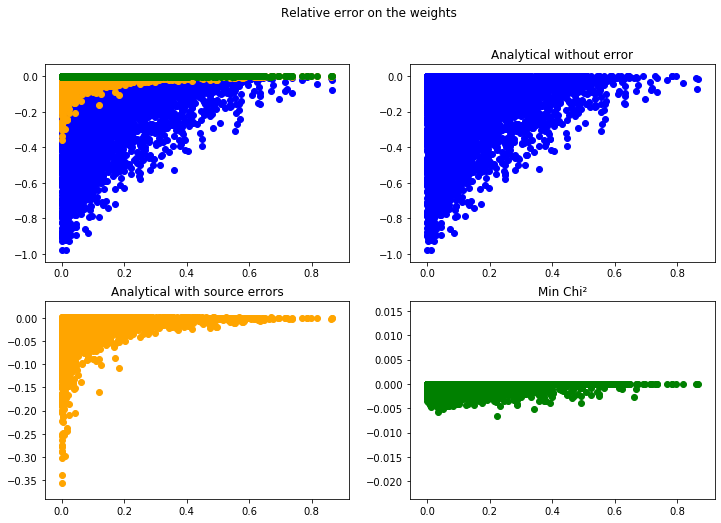

In [26]:
fig = plt.figure()
fig.suptitle("Relative error on the weights")
ax = fig.add_subplot(221)
ax.scatter(weight_true,-(weight_true-weight_a_n)/weight_true, c='blue')
ax.scatter(weight_true,-(weight_true-weight_a_s)/weight_true, c='orange')
ax.scatter(weight_true,-(weight_true-weight_chi)/weight_true, c='green')


ax = fig.add_subplot(222)
ax.scatter(weight_true,-(weight_true-weight_a_n)/weight_true, c='blue')
ax.set_title("Analytical without error")


ax = fig.add_subplot(223)
ax.scatter(weight_true,-(weight_true-weight_a_s)/weight_true, c='orange')
ax.set_title("Analytical with source errors")


ax = fig.add_subplot(224)
ax.scatter(weight_true,-(weight_true-weight_chi)/weight_true, c='green')
ax.set_title("Min Chi²")


plt.show()


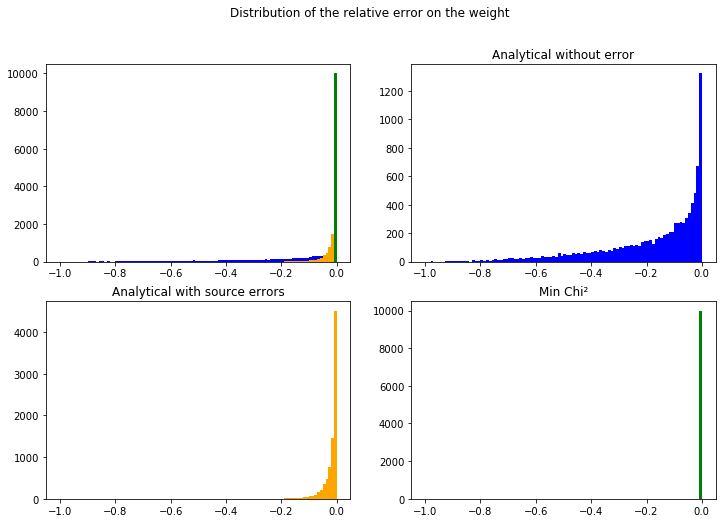

In [27]:
bins=[(i-100)/100  for i in range(101)]
fig = plt.figure()
fig.suptitle("Distribution of the relative error on the weight")
ax = fig.add_subplot(221)
plt.hist(-(weight_true-weight_a_n)/weight_true,bins=bins,color='blue')
plt.hist(-(weight_true-weight_a_s)/weight_true,bins=bins,color='orange')
plt.hist(-(weight_true-weight_chi)/weight_true,bins=bins, color='green')

ax = fig.add_subplot(222)
plt.hist(-(weight_true-weight_a_n)/weight_true,bins=bins,color='blue')
ax.set_title("Analytical without error")

ax = fig.add_subplot(223)
plt.hist(-(weight_true-weight_a_s)/weight_true,bins=bins,color='orange')
ax.set_title("Analytical with source errors")

ax = fig.add_subplot(224)
plt.hist(-(weight_true-weight_chi)/weight_true,bins=bins, color='green')
ax.set_title("Min Chi²")
plt.show()

strategy: get the dominant point from the analytical methode (with source error) and look few sample around for a better point.

In [28]:
centers = np.array(range(8))+1
sigmas=centers/10
sigma_sigmas=sigmas/10

r_i = np.random.normal(centers,sigmas)
sr_i = np.random.normal(sigmas,sigma_sigmas)


sources_id = range(10000)
weight_true =np.zeros(len(sources_id))
weight_chi =np.zeros(len(sources_id))
weight_a_n =np.zeros(len(sources_id))
weight_a_c1 =np.zeros(len(sources_id))
weight_a_c2 =np.zeros(len(sources_id))

a_w =np.zeros(len(sources_id))
a_chi =np.zeros(len(sources_id))
a_a_s =np.zeros(len(sources_id))
a_a_c1 =np.zeros(len(sources_id))
a_a_c2 =np.zeros(len(sources_id))
count_c1=np.zeros(len(sources_id))
count_c2=np.zeros(len(sources_id))

for source_index in sources_id:
    f_i = np.random.normal(centers,sigmas)
    s_i = np.random.normal(sigmas,sigma_sigmas)
    chi_s, w_s, w_s_p, a_min, a_max, min_a_no_err, min_a_source_err = weights_and_min(f_i,s_i,r_i,sr_i,a_s,p_lognormal)
   
    a_w[source_index] = a_max
    a_chi[source_index] = a_min
    a_a_s[source_index] = min_a_source_err
    

    ################################
    
    a_index_c = np.argmin(np.abs(a_s-min_a_source_err))
    a_max_c = a_s[a_index_c]
    
    w_max_c = weight(f_i,s_i,r_i,sr_i,[a_max_c],1)
    
    w_max_c_temp = weight(f_i,s_i,r_i,sr_i,[a_s[a_index_c+1]],1)
    count = 2
    direction = 0
    if w_max_c_temp>w_max_c:
        direction = 1
        a_index_c +=direction
        w_max_c = w_max_c_temp
    else:
        w_max_c_temp = weight(f_i,s_i,r_i,sr_i,[a_s[a_index_c-1]],1)
        count+=1
        if w_max_c_temp>w_max_c:
            direction = -1
            a_index_c +=direction
            w_max_c = w_max_c_temp
 
    while direction!=0:
        count+=1
        w_max_c_temp = weight(f_i,s_i,r_i,sr_i,[a_s[a_index_c+direction]],1)
        if w_max_c_temp>w_max_c:
            a_index_c +=direction
            w_max_c = w_max_c_temp
        else:
            direction = 0
    
    count_c1[source_index] = count
    a_a_c1[source_index] = a_s[a_index_c]
    p_ln= P_log_norm([a_s[a_index_c]],0.6)
    weight_a_c1[source_index] = w_max_c*p_ln
    ##################
    
    ################################
    
    a_index_c = np.argmin(np.abs(a_s-min_a_source_err))
    a_max_c = a_s[a_index_c]
    
    p_ln= P_log_norm([a_max_c],0.6)
    w_max_c = weight(f_i,s_i,r_i,sr_i,[a_max_c],p_ln)
    
    p_ln= P_log_norm([a_s[a_index_c+1]],0.6)
    w_max_c_temp = weight(f_i,s_i,r_i,sr_i,[a_s[a_index_c+1]],p_ln)
    count = 2
    direction = 0
    if w_max_c_temp>w_max_c:
        direction = 1
        a_index_c +=direction
        w_max_c = w_max_c_temp
    else:
        p_ln= P_log_norm([a_s[a_index_c-1]],0.6)
        w_max_c_temp = weight(f_i,s_i,r_i,sr_i,[a_s[a_index_c-1]],p_ln)
        count+=1
        if w_max_c_temp>w_max_c:
            direction = -1
            a_index_c +=direction
            w_max_c = w_max_c_temp
 
    while direction!=0:
        count+=1
        p_ln= P_log_norm([a_s[a_index_c+direction]],0.6)
        w_max_c_temp = weight(f_i,s_i,r_i,sr_i,[a_s[a_index_c+direction]],p_ln)
        if w_max_c_temp>w_max_c:
            a_index_c +=direction
            w_max_c = w_max_c_temp
        else:
            direction = 0
    
    count_c2[source_index] = count
    a_a_c2[source_index] = a_s[a_index_c]
    weight_a_c2[source_index] = w_max_c
    ##################
    
    p_ln= P_log_norm([a_min],0.6)
    weight_chi[source_index] = weight(f_i,s_i,r_i,sr_i,[a_min],p_ln)

    p_ln= P_log_norm([a_max],0.6)
    weight_true[source_index] = weight(f_i,s_i,r_i,sr_i,[a_max],p_ln)

    p_ln= P_log_norm([min_a_source_err],0.6)
    weight_a_s[source_index] = weight(f_i,s_i,r_i,sr_i,[min_a_source_err],p_ln)
    
    

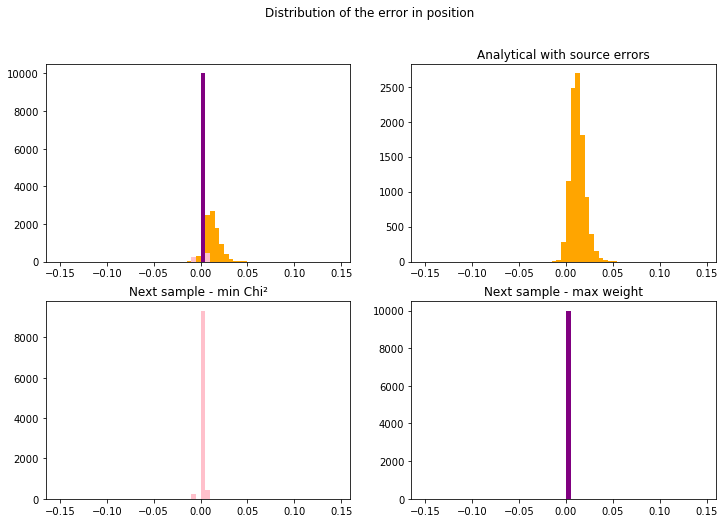

In [29]:
bins=[(i-30)/200  for i in range(60)]
    
fig = plt.figure()
fig.suptitle("Distribution of the error in position")
ax = fig.add_subplot(221)
plt.hist(a_w - a_a_s, bins=bins,color='orange')
plt.hist(a_w - a_a_c1, bins=bins,color='pink')
plt.hist(a_w - a_a_c2, bins=bins,color='purple')

ax = fig.add_subplot(222)
plt.hist(a_w - a_a_s, bins=bins,color='orange')
ax.set_title("Analytical with source errors")

ax = fig.add_subplot(223)
plt.hist(a_w - a_a_c1, bins=bins,color='pink')
ax.set_title("Next sample - min Chi²")

ax = fig.add_subplot(224)
plt.hist(a_w - a_a_c2, bins=bins,color='purple')
ax.set_title("Next sample - max weight")




plt.show()

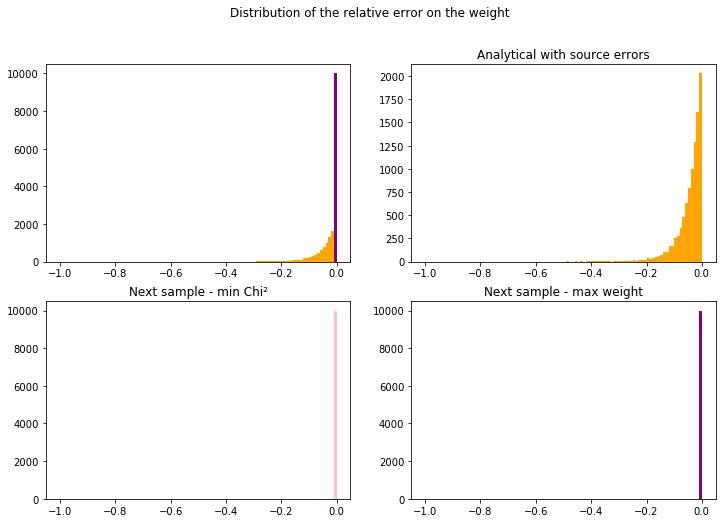

In [30]:
bins=[(i-100)/100  for i in range(101)]
fig = plt.figure()
fig.suptitle("Distribution of the relative error on the weight")
ax = fig.add_subplot(221)
plt.hist(-(weight_true-weight_a_s)/weight_true,bins=bins,color='orange')
plt.hist(-(weight_true-weight_a_c1)/weight_true,bins=bins, color='pink')
plt.hist(-(weight_true-weight_a_c2)/weight_true,bins=bins, color='purple')

ax = fig.add_subplot(222)
plt.hist(-(weight_true-weight_a_s)/weight_true,bins=bins,color='orange')
ax.set_title("Analytical with source errors")

ax = fig.add_subplot(223)
plt.hist(-(weight_true-weight_a_c1)/weight_true,bins=bins, color='pink')
ax.set_title("Next sample - min Chi²")

ax = fig.add_subplot(224)
plt.hist(-(weight_true-weight_a_c2)/weight_true,bins=bins, color='purple')
ax.set_title("Next sample - max weight")

plt.show()


average number of cycle for finding the likelihood max from the estimation:4.0263
average number of cycle for finding the posterior max from the estimation:4.047
distance of the likelihood max from the estimation (in step):2.0263
distance of the posterior max from the estimation (in step):2.0469999999999997


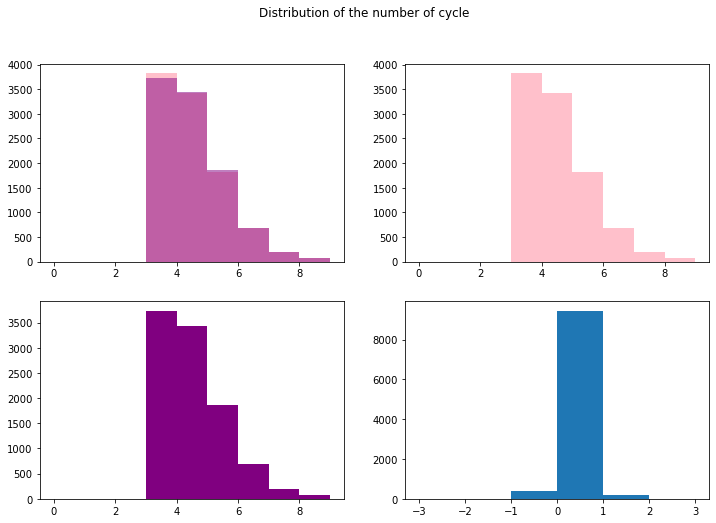

In [31]:

print("average number of cycle for finding the likelihood max from the estimation:"+str(np.mean(count_c1)))
print("average number of cycle for finding the posterior max from the estimation:"+str(np.mean(count_c2)))


print("distance of the likelihood max from the estimation (in step):"+str(np.mean(count_c1)-2))
print("distance of the posterior max from the estimation (in step):"+str(np.mean(count_c2)-2))

bins=range(10)
fig = plt.figure()
fig.suptitle("Distribution of the number of cycle")
ax = fig.add_subplot(221)
plt.hist(count_c1,bins=bins, color='pink')
plt.hist(count_c2,bins=bins, color='purple', alpha = 0.5)

ax = fig.add_subplot(222)
plt.hist(count_c1,bins=bins, color='pink')

ax = fig.add_subplot(223)
plt.hist(count_c2,bins=bins, color='purple')


ax = fig.add_subplot(224)
#plt.scatter(count_c2,count_c1, cmap="coolwarm")
#plt.plot([0,10],[0,10])
his = plt.hist(count_c1-count_c2,[i-3 for i in range(7)])


fraction not zero:5.41%


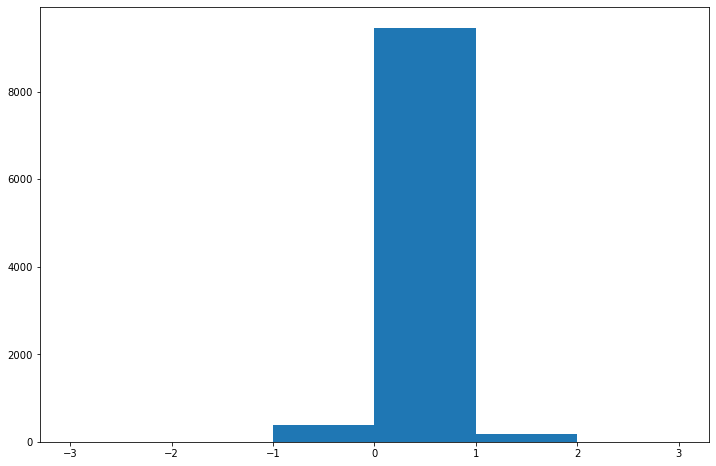

In [32]:
his = plt.hist(count_c1-count_c2,[i-3 for i in range(7)])

tot = sum(his[0])
zero = his[0][3]

fraction_off = (tot - zero)/tot

print("fraction not zero:"+str(fraction_off*100)+"%")